In [2]:
import math
def direction_diff(next_point, prev_point):
    track_dir = math.atan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0])    
    track_degrees = math.degrees(track_dir)   
    return track_degrees

In [3]:
direction_diff((5,3),(4,4))

-45.0

In [4]:
from matplotlib import pyplot as plt

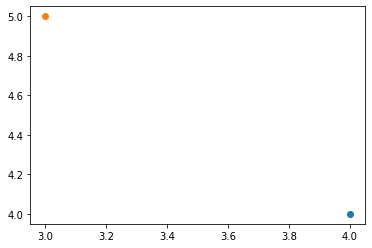

In [5]:
plt.scatter(4,4)
plt.scatter(3,5)

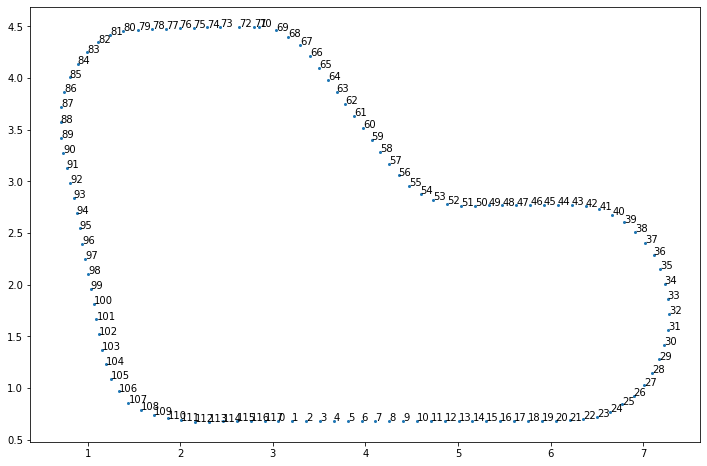

In [13]:
import numpy as np
track = np.load('/Users/TimothyW/Downloads/reinvent_base.npy')
fig = plt.figure()
fig.set_size_inches(12,8)
plt.scatter(track[:-1,0], track[:-1,1], s=4)

for i in range(0, track.shape[0] - 1):    
    plt.annotate(f"{i}", (track[i,0], track[i, 1]))

In [17]:
outer_track = {0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,48,49,50,51,52,53,54,55,56,57,58,59}
inner_track = {23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,67,68,69,70}
middle_track = {44,45,46,47,60,61,62,63,64,65,66}
#over_70 inner track

In [37]:
def path_reward(next_waypoint, outer_track_waypoints, middle_track_waypoints, inner_track_waypoints, track_width, distance_from_center, is_left_of_center):
    if next_waypoint in middle_track_waypoints:
        marker_1 = 0.1 * track_width
        marker_2 = 0.25 * track_width
        marker_3 = 0.5 * track_width

        # Give higher reward if the car is closer to center line and vice versa
        if distance_from_center <= marker_1:
            return 2.0
        elif distance_from_center <= marker_2:
            return 0.5
        elif distance_from_center <= marker_3:
            return 0.1
        else:
            return 1e-3        
    elif next_waypoint in outer_track_waypoints:
        marker_1 = 0.33 * track_width
        marker_2 = 0.25 * track_width
        marker_3 = 0.1 * track_width

        if distance_from_center > marker_1 and not is_left_of_center:
            return 2.0
        elif distance_from_center > marker_2 and not is_left_of_center:
            return 0.5
        elif distance_from_center > marker_3 and not is_left_of_center:
            return 0.1
        else:
            return 1e-3
        
    elif next_waypoint in inner_track_waypoints or next_waypoint > 70:
        marker_1 = 0.33 * track_width
        marker_2 = 0.25 * track_width
        marker_3 = 0.1 * track_width
        if distance_from_center > marker_1 and is_left_of_center:
            return 2.0
        elif distance_from_center > marker_2 and is_left_of_center:
            return 0.5
        elif distance_from_center > marker_3 and is_left_of_center:
            return 0.1
        else:
            return 1e-3
        
    else:
        raise ValueError("crap")



In [36]:
path_reward(75, outer_track, middle_track, inner_track, track_width=1.6, distance_from_center= 0.37*1.6, is_left_of_center=True)

2.0